# Part 10: Ensemble Learning

We apply three different ensemble models to the scikit-learn breast_cancer dataset

We begin by importing all needed libraries.

We will use scikit-learn to load and split our dataset and create and evaluate our models. We will also use pandas for organizing our model metrics results and matplotlib to visualize those metrics in the form of a bar chart.

For miscellaneous operations we will also use numpy.

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation

We load our dataset.

In [2]:
breast_cancer = datasets.load_breast_cancer()

Taking a look at the dataset description can give us some insights.

In [3]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

What are the different features and targets?

In [4]:
breast_cancer.feature_names, breast_cancer.target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

We extract the features and the targets from our dataset.

In [5]:
features = breast_cancer.data
targets = breast_cancer.target

And split them into training and test sets.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets)

## Modeling and evaluation

For this task, we will use three different models. A bagging classifier with logistic regression in its core, a gradient boosting classifier and a random forest.

### Bagging classifier

We begin with the first classifier and fit it on our data.

In [7]:
bagging_clf = BaggingClassifier(LogisticRegression(max_iter=np.inf)).fit(x_train, y_train)

We extract predictions.

In [8]:
bagging_predicted = bagging_clf.predict(x_test)

And evaluate the model based on some metrics.

In [9]:
bagging_metrics = {'F1': metrics.f1_score(y_test, bagging_predicted, average='micro'),
'Accuracy': metrics.accuracy_score(y_test, bagging_predicted),
'Precision': metrics.precision_score(y_test, bagging_predicted, average='micro'),
'Recall': metrics.recall_score(y_test, bagging_predicted, average='micro')}

In [10]:
bagging_metrics

{'F1': 0.986013986013986,
 'Accuracy': 0.986013986013986,
 'Precision': 0.986013986013986,
 'Recall': 0.986013986013986}

### Gradient Boosting classifier

We do the same for the rest of the classifiers.

In [11]:
gb_clf = GradientBoostingClassifier().fit(x_train, y_train)

In [12]:
gb_predicted = gb_clf.predict(x_test)

In [13]:
gb_metrics = {'F1': metrics.f1_score(y_test, gb_predicted, average='micro'),
'Accuracy': metrics.accuracy_score(y_test, gb_predicted),
'Precision': metrics.precision_score(y_test, gb_predicted, average='micro'),
'Recall': metrics.recall_score(y_test, gb_predicted, average='micro')}

In [14]:
gb_metrics

{'F1': 0.972027972027972,
 'Accuracy': 0.972027972027972,
 'Precision': 0.972027972027972,
 'Recall': 0.972027972027972}

### Random Forest classifier

In [15]:
rf_clf = RandomForestClassifier().fit(x_train, y_train)

In [16]:
rf_predicted = rf_clf.predict(x_test)

In [17]:
rf_metrics = {'F1': metrics.f1_score(y_test, rf_predicted, average='micro'),
'Accuracy': metrics.accuracy_score(y_test, rf_predicted),
'Precision': metrics.precision_score(y_test, rf_predicted, average='micro'),
'Recall': metrics.recall_score(y_test, rf_predicted, average='micro')}

In [18]:
rf_metrics

{'F1': 0.986013986013986,
 'Accuracy': 0.986013986013986,
 'Precision': 0.986013986013986,
 'Recall': 0.986013986013986}

### Comparison

Once we are done we build a dataframe out of our metrics.

In [19]:
metrics_df = pd.DataFrame((bagging_metrics, gb_metrics, rf_metrics),
                          ['Bagging with Logistic regression', 'Gradient Boosting', 'Random Forest'])
metrics_df

,F1,Accuracy,Precision,Recall
Bagging with Logistic regression,0.986014,0.986014,0.986014,0.986014
Gradient Boosting,0.972028,0.972028,0.972028,0.972028
Random Forest,0.986014,0.986014,0.986014,0.986014


The dataset will help us visualize different metric scores among classifiers.

Out of all classifiers, the bagging classifier with logistic regression seems to have performed best.

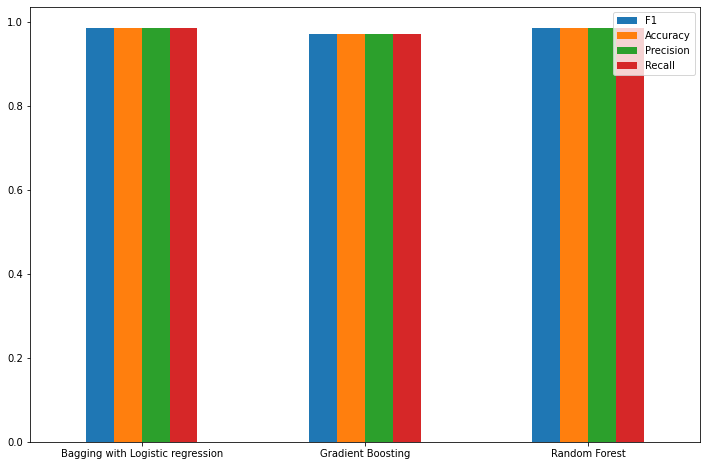

In [20]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
metrics_df.plot.bar(rot=0, ax=ax);

Finally, we save the bar plot in a png image.

In [21]:
fig.savefig('Metrics bar plot comparison.png')